### Importación de datos



In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [32]:
# Calcula la facturación por vendedor para la tienda 1
facturacion_tienda1 = tienda1['Precio'].sum()

# Calcula la facturación por vendedor para la tienda 2
facturacion_tienda2 = tienda2['Precio'].sum()

# Calcular la facturación por vendedor para la tienda 3
facturacion_tienda3 = tienda3['Precio'].sum()

# Calcular la facturación por vendedor para la tienda 4
facturacion_tienda4 = tienda4['Precio'].sum()

In [7]:
#Verificaion del tipo de variable para el grafico
print(type(facturacion_tienda1))
print(type(facturacion_tienda2))
print(type(facturacion_tienda3))
print(type(facturacion_tienda4))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


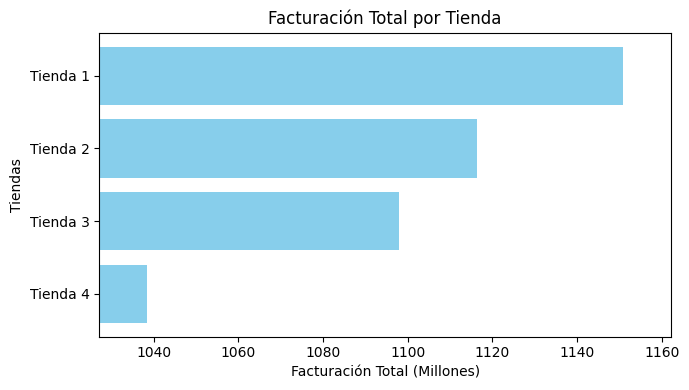

In [20]:
# Datos de facturación y nombres de tiendas
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturaciones = [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]

# Convierte facturaciones a millones
facturaciones_en_millones = [f / 1000000 for f in facturaciones]

# Crea el gráfico de barras horizontales
plt.figure(figsize=(7, 4))
plt.barh(nombres_tiendas, facturaciones_en_millones, color='skyblue')
plt.xlabel('Facturación Total (Millones)')
plt.ylabel('Tiendas')
plt.title('Facturación Total por Tienda')
plt.gca().invert_yaxis()

# Personaliza las etiquetas del eje x
def millones(x, pos):
    'Formatea el tick como entero'
    return f'{int(x)}'

plt.ticklabel_format(style='plain', axis='x') # Asegura que no haya notación científica
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(millones))

# Establecer los límites del eje x para que el cero represente 1000 millones
min_facturacion_millones = min(facturaciones_en_millones)
max_facturacion_millones = max(facturaciones_en_millones)

# Calcular un rango adecuado basado en los datos en millones
rango = max_facturacion_millones - min_facturacion_millones
padding = rango * 0.1  # Un pequeño espacio alrededor de los datos

plt.xlim(min_facturacion_millones - padding, max_facturacion_millones + padding)

plt.tight_layout()
plt.show()

Por lo tanto en la categoría de facturación la *tienda 4* es la que menos genera, pero pueden haber muchos factores para que esto ocurra, hay que analiza el resto de factores para saber si en realidad es una tienda rentable de mantener o no.

# 2. Ventas por categoría

In [2]:
ventas_categoria_t1 = tienda1.groupby('Categoría del Producto')['Precio'].sum()
ventas_categoria_t2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
ventas_categoria_t3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
ventas_categoria_t4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()

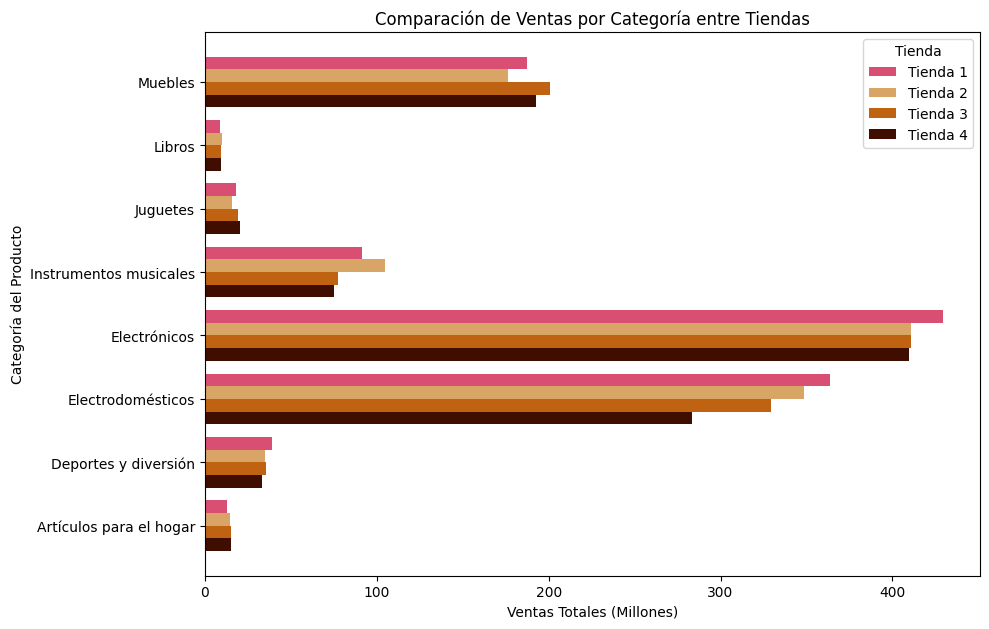

In [3]:
# 1. Identifica todas las categorías únicas
categorias_unicas = pd.concat([ventas_categoria_t1, ventas_categoria_t2, ventas_categoria_t3, 
                               ventas_categoria_t4]).index.unique().sort_values(ascending=False)

# 2. Crea un DataFrame para facilitar la graficación
df_comparacion_ventas = pd.DataFrame({
    'Tienda 1': ventas_categoria_t1.reindex(categorias_unicas).fillna(0),
    'Tienda 2': ventas_categoria_t2.reindex(categorias_unicas).fillna(0),
    'Tienda 3': ventas_categoria_t3.reindex(categorias_unicas).fillna(0),
    'Tienda 4': ventas_categoria_t4.reindex(categorias_unicas).fillna(0)
})

# **Ordenar el DataFrame**
orden_deseado_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Define los colores para cada tienda
colores = ['#D94E73', '#D9A566', '#BF6211', '#400D01'] # rosado, Naranja, Verde, Rojo (colores más agradables)
# Puedes usar cualquier otro código de color (hex, RGB, nombres de colores de matplotlib)

# Ancho de las barras
ancho_barra = 0.2
posiciones = np.arange(len(categorias_unicas))

fig, ax = plt.subplots(figsize=(10, len(categorias_unicas) * 0.8))

for i, tienda in enumerate(orden_deseado_tiendas):
    ax.barh(posiciones + i * ancho_barra, df_comparacion_ventas[tienda] / 1000000,
            ancho_barra, label=tienda, color=colores[i])

ax.set_yticks(posiciones + (len(orden_deseado_tiendas) - 1) / 2 * ancho_barra)
ax.set_yticklabels(categorias_unicas)
ax.invert_yaxis()
ax.set_xlabel('Ventas Totales (Millones)')
ax.set_ylabel('Categoría del Producto')
ax.set_title('Comparación de Ventas por Categoría entre Tiendas')
ax.legend(title='Tienda')
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{int(x)}'))
plt.tight_layout()
plt.show()

Del gráfico se puede observar que los artículos más vendidos son los **electrónicos** en las cuatro tiendas, pero la tienda 4 es la que más vende en comparación a las otras tres tiendas. Además el producto menos vendido son los **libros** y la tienda 3 es la que más libros vende.

Hay 3 productos que llaman la atención, ya que en apariencia sus ventas varían mucho entre las cuatro tiendas, así que se procede a analizarlos: muebles, instrumentos musicales y electrodomésticos.

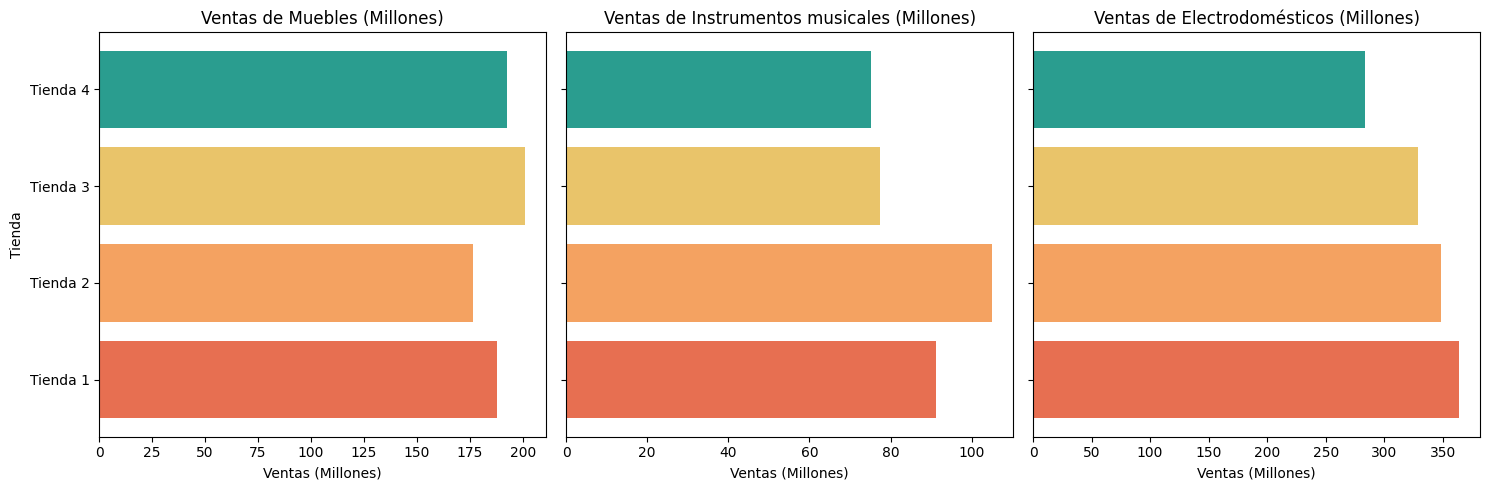

In [4]:
productos_problema = ['Muebles', 'Instrumentos musicales', 'Electrodomésticos']
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
data_por_tienda = {}

for tienda_num in range(1, 5):
    nombre_columna_tienda = f'Tienda {tienda_num}'
    data_por_tienda[nombre_columna_tienda] = df_comparacion_ventas.loc[productos_problema, nombre_columna_tienda].values

fig, axes = plt.subplots(nrows=1, ncols=len(productos_problema), figsize=(15, 5), sharey=True)

for i, producto in enumerate(productos_problema):
    axes[i].barh(nombres_tiendas, [data_por_tienda[f'Tienda {t}'][i] / 1000000 for t in range(1, 5)], color=['#e76f51', '#f4a261', '#e9c46a', '#2a9d8f'])
    axes[i].set_title(f'Ventas de {producto} (Millones)')
    axes[i].set_xlabel('Ventas (Millones)')
    if i == 0:
        axes[i].set_ylabel('Tienda')

plt.tight_layout()
plt.show()

En los 3 gráficos se observa que la mayor diferencia de ventas por tienda se acentúa en la venta de instrumentos musicales y en la venta de electrodomésticos. Así que observemos en los 3 casos de cuánto son esas diferencias exactas.

* **Venta de Muebles**

*Tienda que vende más:* Tienda 3

*Tienda que vende menos:* Tienda 2


In [13]:
# Diferencia 
print(f'Diferencia de: {((ventas_categoria_t3['Muebles'] - ventas_categoria_t2['Muebles'])/1000000):.1f} millones')

Diferencia de: 24.6 millones


* **Venta de Instrumentos musicales**

*Tienda que vende más:* Tienda 2

*Tienda que vende menos:* Tienda 4

In [15]:
# Diferencia 
print(f'Diferencia de: {((ventas_categoria_t2['Instrumentos musicales'] - 
                          ventas_categoria_t4['Instrumentos musicales'])/1000000):.1f} millones')

Diferencia de: 29.9 millones


* **Venta de Electrodomésticos**

*Tienda que vende más:* Tienda 1

*Tienda que vende menos:* Tienda 4

In [16]:
# Diferencia 
print(f'Diferencia de: {((ventas_categoria_t1['Electrodomésticos'] - 
                          ventas_categoria_t4['Electrodomésticos'])/1000000):.1f} millones')

Diferencia de: 80.4 millones


En los 3 casos esta diferencia de ventas es bastante grande, pero en la que más se acentúa es en la venta de electrodomésticos, por lo que podría indicar que la tienda 4 puede tener un marketing deficiente sobre esta categoría aunque no es algo que se pueda asegurar de esta forma, ya que faltaría realizar más analisis al respecto. O ser algo que podría mejorarse.

# 3. Calificación promedio de la tienda


### Análisis de la calificación promedio por tienda

In [29]:
calificacion_tienda1 = round(tienda1.Calificación.mean(), 2)
calificacion_tienda2 = round(tienda2.Calificación.mean(), 2)
calificacion_tienda3 = round(tienda3.Calificación.mean(), 2)
calificacion_tienda4 = round(tienda4.Calificación.mean(), 2)

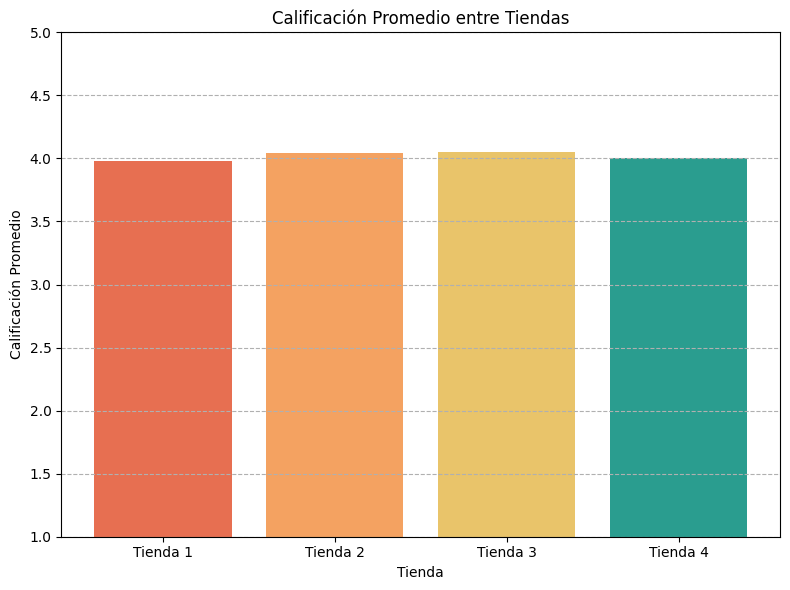

In [39]:
dic_calificaciones_promedio = {
    'Tienda 1': calificacion_tienda1,
    'Tienda 2': calificacion_tienda2,
    'Tienda 3': calificacion_tienda3,
    'Tienda 4': calificacion_tienda4
}

nombres_tiendas = list(dic_calificaciones_promedio.keys())
promedios_calificacion = list(dic_calificaciones_promedio.values())
max1 = tienda1.Calificación.max()
min1 = tienda1.Calificación.min()

plt.figure(figsize=(8, 6))
plt.bar(nombres_tiendas, promedios_calificacion, color=['#e76f51', '#f4a261', '#e9c46a', '#2a9d8f'])
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio entre Tiendas')
plt.ylim(min1, max1)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

En cuanto a la caclificación de cada tienda, no se notan grandes diferencias, por lo que se procede a analizar la calificación por categoría de producto.

### Análisis de la calificación promedio por categoría y por tienda

In [42]:
calificacion_categoria_t1 = tienda1.groupby('Categoría del Producto')['Calificación'].mean()
calificacion_categoria_t2 = tienda2.groupby('Categoría del Producto')['Calificación'].mean()
calificacion_categoria_t3 = tienda3.groupby('Categoría del Producto')['Calificación'].mean()
calificacion_categoria_t4 = tienda4.groupby('Categoría del Producto')['Calificación'].mean()

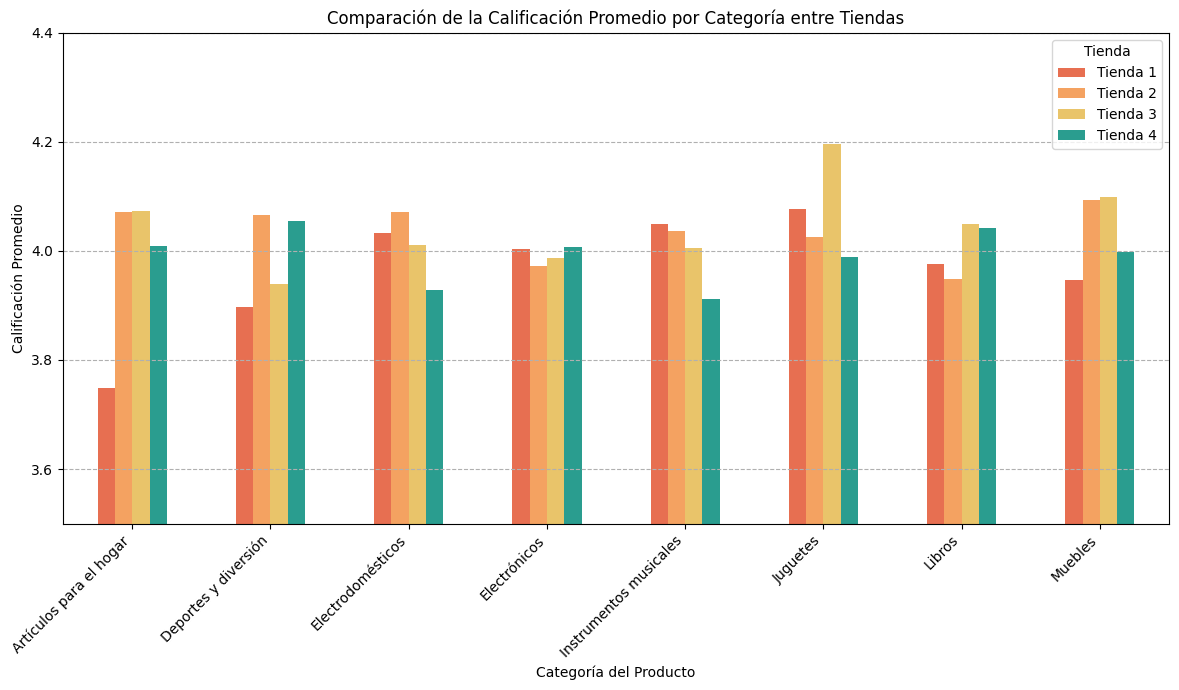

In [48]:
# 1. Identifica todas las categorías únicas
categorias_unicas = pd.concat([calificacion_categoria_t1, calificacion_categoria_t2,
                                calificacion_categoria_t3, calificacion_categoria_t4]).index.unique()

# 2. Crea un DataFrame para facilitar la graficación
df_calificaciones_categ = pd.DataFrame({
    'Tienda 1': calificacion_categoria_t1.reindex(categorias_unicas).fillna(0),
    'Tienda 2': calificacion_categoria_t2.reindex(categorias_unicas).fillna(0),
    'Tienda 3': calificacion_categoria_t3.reindex(categorias_unicas).fillna(0),
    'Tienda 4': calificacion_categoria_t4.reindex(categorias_unicas).fillna(0)
})

# 3. Crea el gráfico de barras agrupadas
ax = df_calificaciones_categ.plot(kind='bar', figsize=(12, 7), color=['#e76f51', '#f4a261', '#e9c46a', '#2a9d8f'])

plt.ylabel('Calificación Promedio')
plt.xlabel('Categoría del Producto')
plt.title('Comparación de la Calificación Promedio por Categoría entre Tiendas')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x para mejor legibilidad
plt.legend(title='Tienda')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.ylim(3.5, 4.4)
plt.show()

Para el gráfico anterior, la escala ha sido modificada con el fin de resaltar las diferencias, aunque en puntos sea mínima, en realidad estas diferencias nos indican muchas cosas.
1. En **artículos para el hogar** la tienda 1 tiene calificaciones más bajas que en el resto de tiendas, situación que habría que revisar, ¿acaso los productos son de menor calidad?, ¿están mal ubicados? ¿tienen precios más altos? ¿los empleados no están haciendo bien su trabajo frente al cliente? ¿hay problemas con los envíos?

2. En **deportes y diversión** ocurre algo similar, pero esta vez hay 2 tiendas con calificaciones similares (tiendas 2 y 4), pero la calificación de la tienda 1 vuelve a ser la más baja.

3. En **electrodomésticos** la tienda 4 es la de menor puntuación por lo que habría que revisar más esta tienda en sta categoría.

4. En **instrumentos musicales** la tienda 4 tiene menor puntuación así que también habría que revisarla en esta categoría.

5. En **juguetes** la tienda 4 tiene menor calificación, aún asi resalta mucho que la tienda 3 esté tan por encima del rsto, así que habría que revisar también la tienda 3.

6. En **libros** las tiendas (1 y 2) tienen calificacions similares, aún así la tienda 2 es la de menor calificación de las 3, y las otras dos tiendas (3 y 4) también tienen calificaciones similaes, por lo que se podría revisar que tienen en común en parejas para averiguar el motivo de las diferencias.

7. En **muebles** hay una discrepancia mas amplia entre la tienda 1 (menor calificación) y le tienda 3 (mayor calificación) además aquí también van en pares, las tiendas 1 y 4 varían menos entre ellas, y las tiendas 2 y 3 tienen calificaciones similares.

Por lo tanto es necesario analizar más estas variables, ya que por si solas no es posible tomar una decisión de cierre.

### Análisis de la calificación promedio por categoría

### Análisis de la distribucuón de las calificaciones para cada categoría (comparación por tienda)

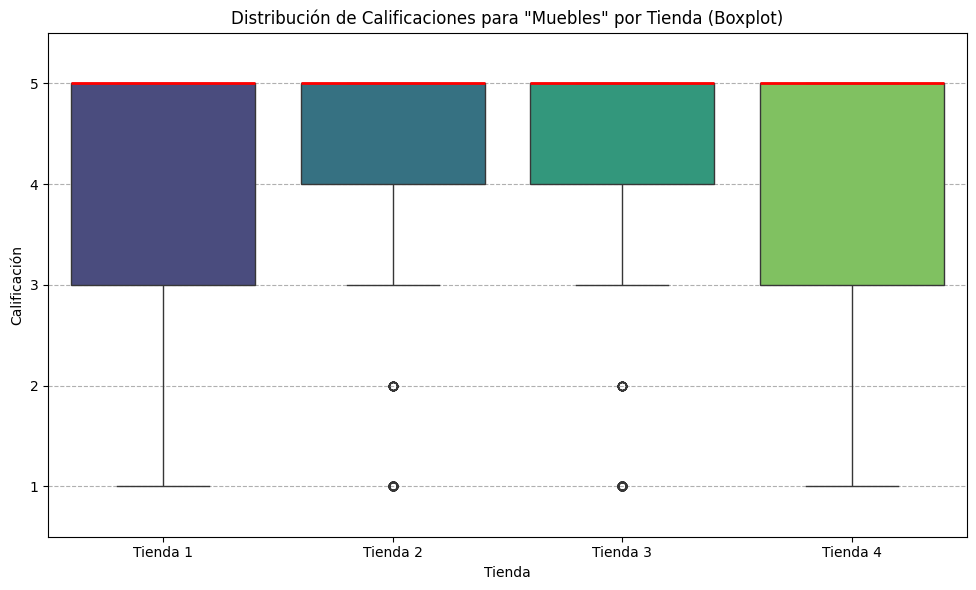

In [71]:
tiendas_dfs = {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}
categoria_analizar = 'Muebles'

plt.figure(figsize=(10, 6))

# Crear una lista para almacenar DataFrames con la columna 'Tienda' añadida
data_para_boxplot = []
for nombre_tienda, df_tienda in tiendas_dfs.items():
    subset = df_tienda[df_tienda['Categoría del Producto'] == categoria_analizar].copy()
    subset['Tienda'] = nombre_tienda
    data_para_boxplot.append(subset)

# Concatenar los DataFrames en uno solo para Seaborn
df_boxplot = pd.concat(data_para_boxplot)

sns.boxplot(y='Calificación', x='Tienda', data=df_boxplot, palette="viridis", hue='Tienda', 
            legend=False, medianprops={'color': 'red', 'linewidth': 2})
plt.title(f'Distribución de Calificaciones para "{categoria_analizar}" por Tienda (Boxplot)')
plt.xlabel('Tienda')
plt.ylabel('Calificación')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.ylim(0.5, 5.5)
plt.show()

1. En la **Tienda 1** se puede observar que el 50% de las calificaciones están entre 3 y 5 al igual que en la **Tienda 4**. Por otra parte en la **Tienda 2** y **Tienda 3** el 50% de los datos están entre 4 y 5.
2. En las cuatro tiendas se presenta una mediana ubicada en el límite superior, esto indica que 50% o más de las calificaciones son la puntuación máxima de 5, esto indica **satisfacción de los clientes en la categoría de muebles en las 4 tiendas**.

In [63]:
print(round(calificacion_categoria_t3['Artículos para el hogar'] - 
            calificacion_categoria_t1['Artículos para el hogar'], 2))


0.32


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda

# 6. Análisis final